# K means clustering on online sales data with 2 features for a better visualizaion purpose 

K-menas on shopping data ( we will choose only two columns for better visulazion )

In [1]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [2]:
cd c:\\users\deepu\downloads


c:\users\deepu\downloads


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
demo = pd.read_csv('shopping_data.csv')

In [5]:
demo

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
demo.drop(['CustomerID','Genre','Age'], axis = 1,inplace = True)

In [7]:
demo

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


## Okay let's just build a simple K means clustering without doing much of feature engineerng and then we will do features engineering

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(demo)

KMeans(n_clusters=4)

In [10]:
# let's check the centers 
centers=kmeans.cluster_centers_
print(centers)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [48.26       56.48      ]
 [26.30434783 20.91304348]]


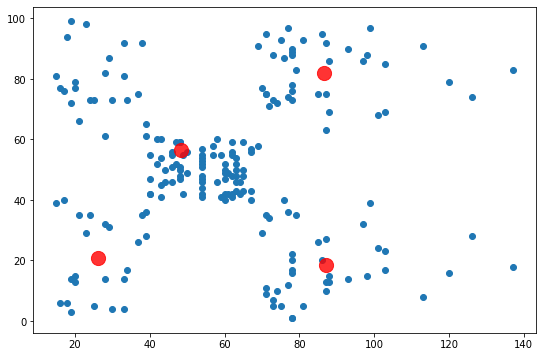

In [11]:
# Let's plot it 
plt.figure(figsize = (9,6))
plt.scatter(demo.iloc[:,0],demo.iloc[:,1])
plt.scatter(centers[:,0],centers[:,1],color = 'red', s = 200, alpha = .8)
plt.show()

In [12]:
# Now that we have the clusters what if i choose the value of K to be 1,2,3 or so on so what decides the best values of K
# That is done by evaluating the inertia / error

### InertiaIn K-means clustering, the sum of squares of distances (often referred to as "inertia" or "within-cluster sum of squares") is used as an internal evaluation metric to assess the quality of clustering. The objective of the K-means algorithm is to minimize this sum of squares.

A lower sum of squares indicates that the data points are closer to their cluster centroids, implying tighter and more compact clusters. However, a lower sum of squares alone doesn't guarantee that you have good or optimal clusters. It's essential to consider a few things:

1. **Varying Number of Clusters (K)**: The sum of squares tends to decrease as the number of clusters increases. However, it doesn't mean that more clusters are better. You'll need to use additional techniques (like the elbow method or silhouette score) to determine the optimal number of clusters.

2. **Cluster Separation**: Simply minimizing the sum of squares doesn't guarantee meaningful or well-separated clusters. Assessing how distinct the clusters are from each other is crucial for the quality of clustering.

3. **Domain Knowledge**: Always consider the context of your problem. Sometimes, the "right" number of clusters might not be purely based on statistical measures. Understanding the domain can help in interpreting the clusters better.

4. **Robustness**: Check the robustness of the clustering results. Re-running the algorithm with different initializations and verifying the consistency of the clusters is important.

5. **Use of Additional Metrics**: While the sum of squares is an essential measure, combining it with other evaluation metrics like silhouette score, Davies-Bouldin index, or visual inspection can provide a more comprehensive assessment of the clustering quality.

In summary, while a lower sum of squares is desirable and indicative of compact clusters, it's not the sole factor in determining whether the clusters are "good". Using a combination of evaluation metrics and domain knowledge will help in making a more informed judgment about the quality of the clusters.


In [13]:
# let's calculate the inertia of our modle with k = 4
kmeans.inertia_

73679.78903948836

In [14]:
k_values = range(2,21)
inertia_values = []
for i in k_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(demo)
    inertia=kmeans.inertia_
    inertia_values.append(inertia)

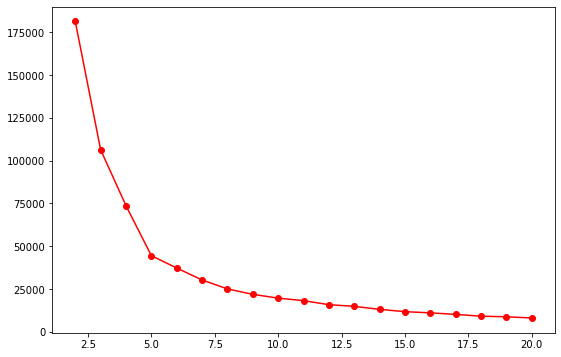

In [15]:
plt.figure(figsize = (9,6))
plt.plot(k_values,inertia_values,marker = 'o',color = 'red')
plt.show()

In [16]:
# so we will choose the value of k = 5 as there is a significant drop at k = 5

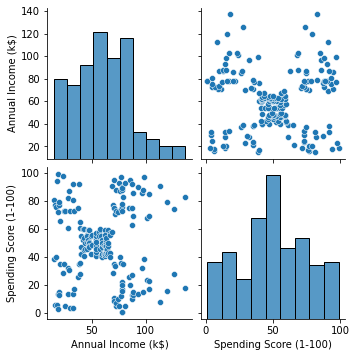

In [17]:
sns.pairplot(demo)

# lets check the distribution on the features 

In [18]:
# So we have outlier 
demo.skew()

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

The annual income is a bit right skewed 

In [19]:
demo['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [20]:
# the spending score is a bit left skewed

In [21]:
demo['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

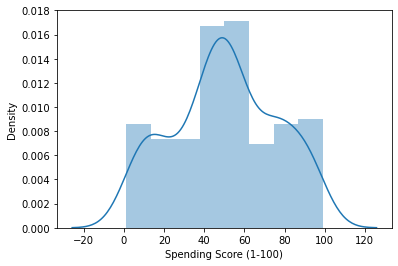

In [22]:
sns.distplot(demo['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

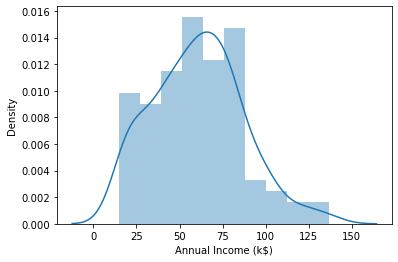

In [23]:
sns.distplot(demo['Annual Income (k$)'])

let's do a power transformation

In [24]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [25]:
powerdemo = pd.DataFrame(pt.fit_transform(demo),columns = demo.columns) # the pt.fit_transform gives array will have to convert it into dataframe 
powerdemo.head(5)

,Annual Income (k$),Spending Score (1-100)
0,-1.989930,-0.385308
1,-1.989930,1.164467
2,-1.930366,-1.820424
3,-1.930366,1.023549
4,-1.872032,-0.346103


## The transformed dataset

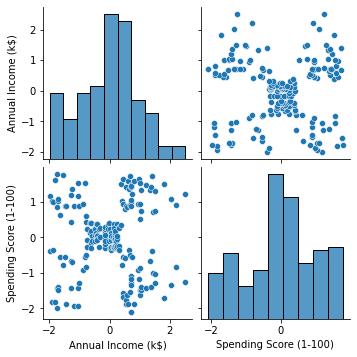

In [26]:
sns.pairplot(powerdemo,)

## The untransformed dataset

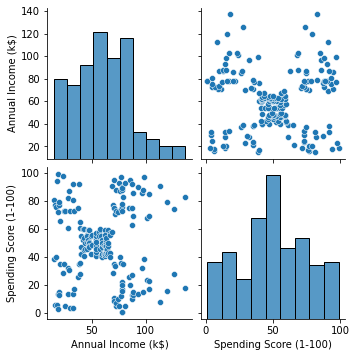

In [27]:
sns.pairplot(demo,)

In [28]:
print(powerdemo.skew())
print('')
print(demo.skew())

Annual Income (k$)       -0.063780
Spending Score (1-100)   -0.223377
dtype: float64

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


##  We can do a experiment where we can try the log transformation on the data and see how is the skew changing 

### feaure Annual income

0.3218425498619055

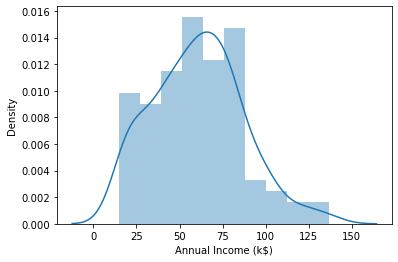

In [29]:
#on the untransformed data
sns.distplot(demo['Annual Income (k$)'])
demo['Annual Income (k$)'].skew()

-0.7596281254451491

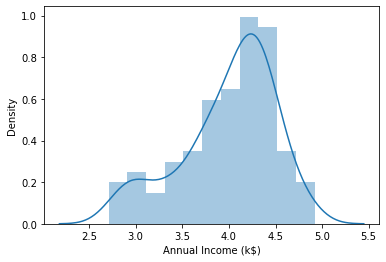

In [30]:
sns.distplot(np.log(demo['Annual Income (k$)']))
np.log(demo['Annual Income (k$)']).skew()
# this made it more left skewed

### feature spending score

-0.047220201374263374

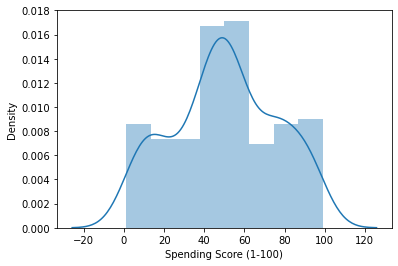

In [31]:
sns.distplot(demo['Spending Score (1-100)'])
demo['Spending Score (1-100)'].skew()

-1.8066668619434054

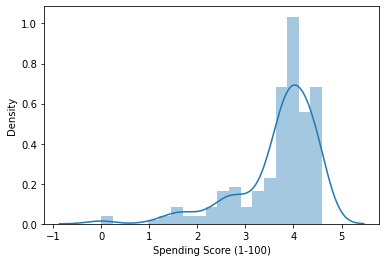

In [32]:
sns.distplot(np.log(demo['Spending Score (1-100)']))
np.log(demo['Spending Score (1-100)']).skew()
# made it more left skewed

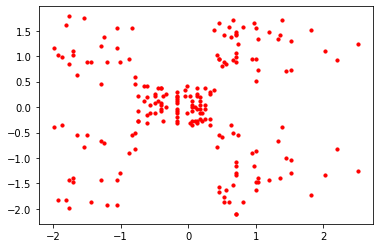

In [33]:
plt.scatter(powerdemo.iloc[:,0],powerdemo.iloc[:,1],color = 'red', s = 10)


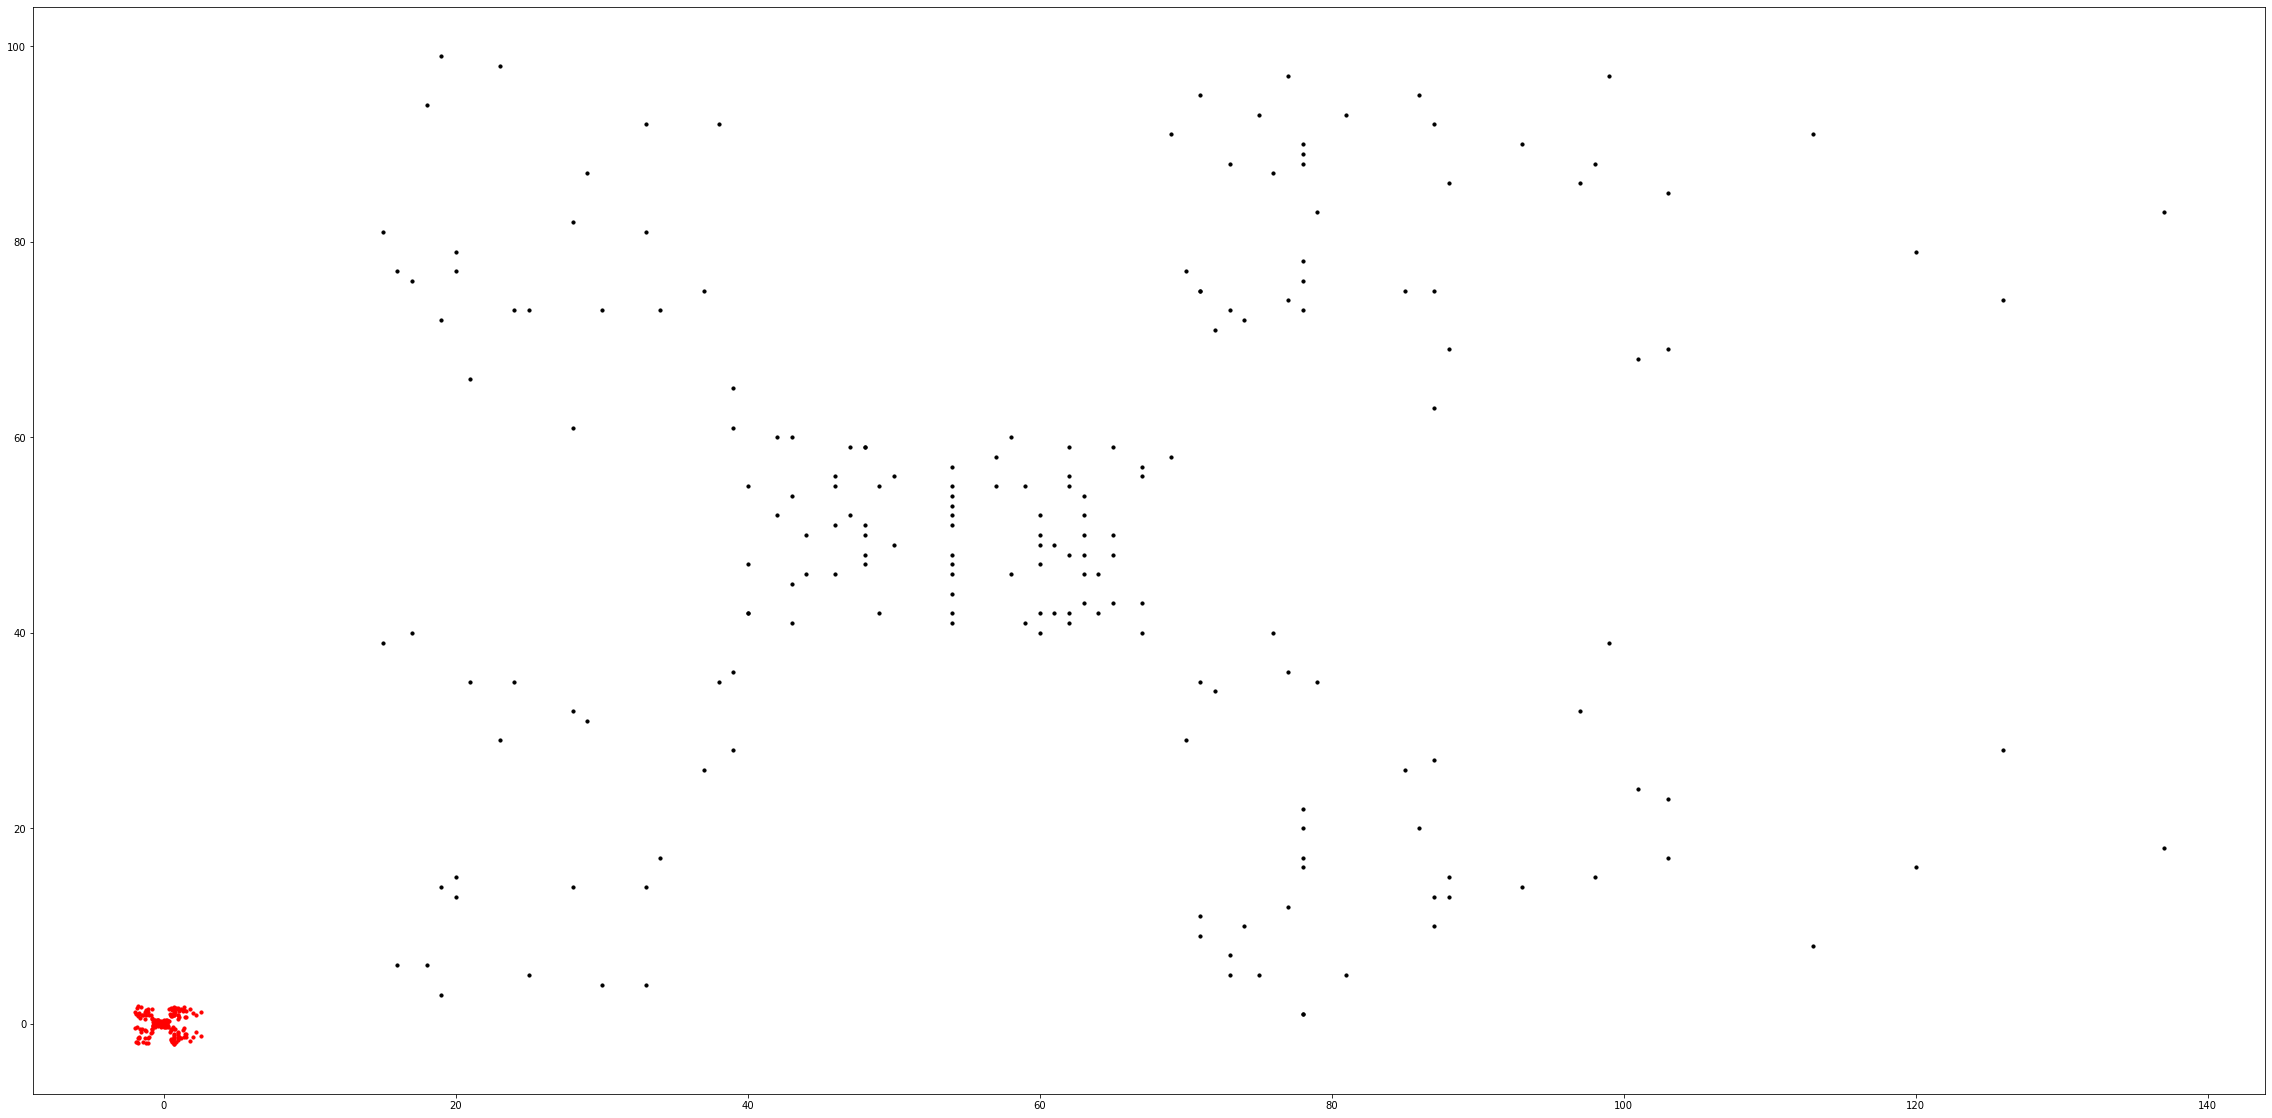

In [34]:
# see what the power transformation did 
plt.figure(figsize = (40,20))
plt.scatter(powerdemo.iloc[:,0],powerdemo.iloc[:,1],color = 'red', s = 10)
plt.scatter(demo.iloc[:,0],demo.iloc[:,1],color = 'black',s = 10)

In [35]:
k_values = range(2,21)
inertia_values_powerdemo = []
for i in k_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(powerdemo)
    inertia=kmeans.inertia_
    inertia_values_powerdemo.append(inertia)

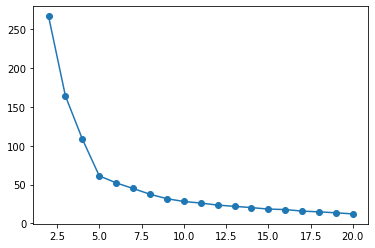

In [36]:
plt.plot(k_values,inertia_values_powerdemo,marker = 'o')

In [37]:
#We chose K = 5

In [38]:
# let's fit the mode
kmeans_powerdemo = KMeans(n_clusters = 5)
kmeans_powerdemo.fit(powerdemo)

KMeans(n_clusters=5)

In [39]:
centers_powerdemo=kmeans_powerdemo.cluster_centers_

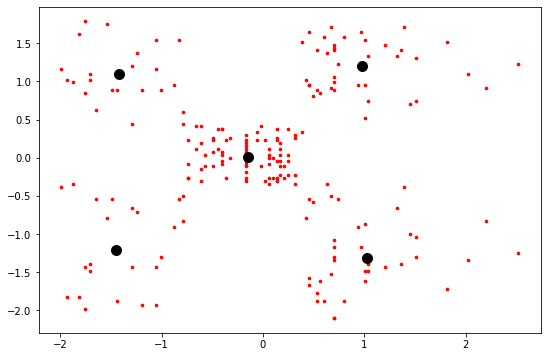

In [40]:
plt.figure(figsize = (9,6))
plt.scatter(powerdemo.iloc[:,0],powerdemo.iloc[:,1],c = 'red' , s = 7)
plt.scatter(centers_powerdemo[:,0],centers_powerdemo[:,1],s = 100,alpha = 1,c = 'black')
plt.show()

In [41]:
kmeans_powerdemo.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [42]:
# Now that we have lables lets combine and form a dataframe 

In [43]:
powerdemo['labels'] = kmeans_powerdemo.labels_

In [44]:
powerdemo.head()

,Annual Income (k$),Spending Score (1-100),labels
0,-1.989930,-0.385308,2
1,-1.989930,1.164467,3
2,-1.930366,-1.820424,2
3,-1.930366,1.023549,3
4,-1.872032,-0.346103,2


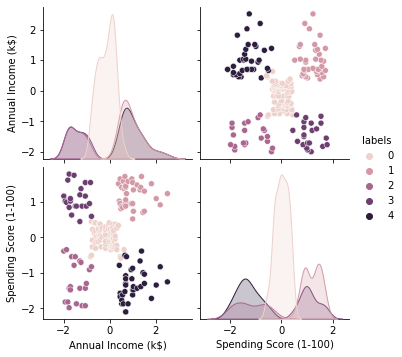

In [45]:
sns.pairplot(powerdemo,diag_kind = 'kde',hue = 'labels')

In [46]:
# what is the meaning of these cluster what do they reperesnt , it represent the average behavior 

In [47]:
powerdemo.head()

,Annual Income (k$),Spending Score (1-100),labels
0,-1.989930,-0.385308,2
1,-1.989930,1.164467,3
2,-1.930366,-1.820424,2
3,-1.930366,1.023549,3
4,-1.872032,-0.346103,2


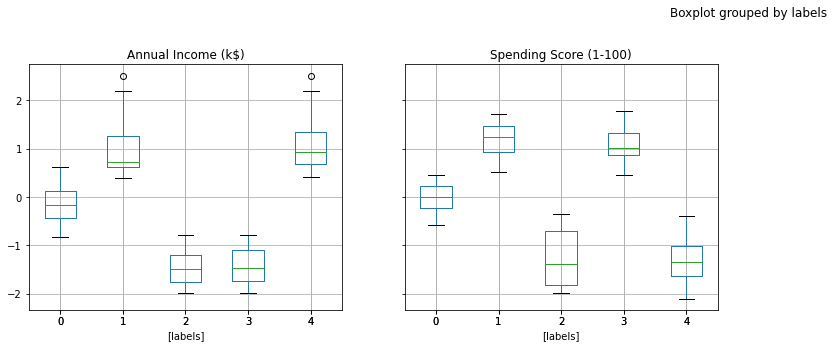

In [48]:
powerdemo.boxplot(by = 'labels',layout=  (2,4), figsize = (25,10))
plt.show()

<AxesSubplot:xlabel='labels', ylabel='Annual Income (k$)'>

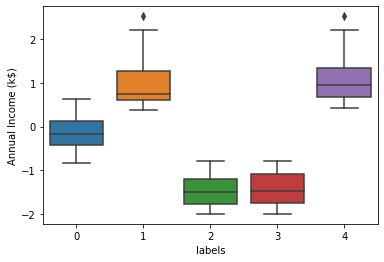

In [49]:
sns.boxplot(x = 'labels', y = 'Annual Income (k$)',data = powerdemo )

<AxesSubplot:xlabel='labels', ylabel='Spending Score (1-100)'>

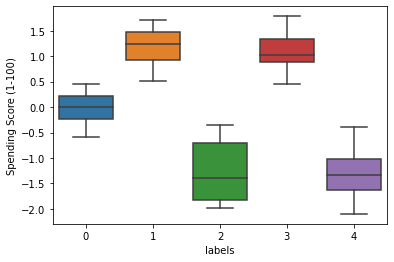

In [50]:
sns.boxplot(x = 'labels', y = 'Spending Score (1-100)', data = powerdemo)

creating a dataframe as per group and ploting a scatter plot with differnet colors

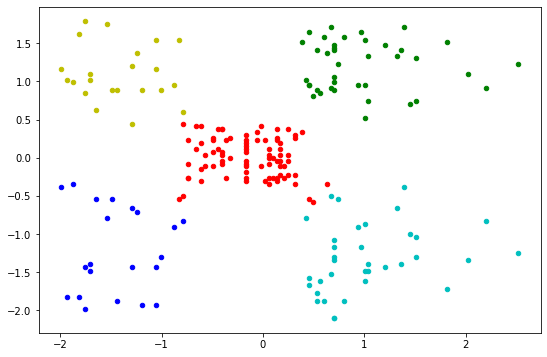

In [51]:
plt.figure(figsize = (9,6))
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(len(powerdemo.labels.value_counts().tolist())):
    plt.scatter(powerdemo[powerdemo.labels  == i].iloc[:,0],powerdemo[powerdemo.labels  == i].iloc[:,1],s = 20, c = colors[i])
    

We have five clusters

# Dendrogram 
Theory is very easy refer to the notebook

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

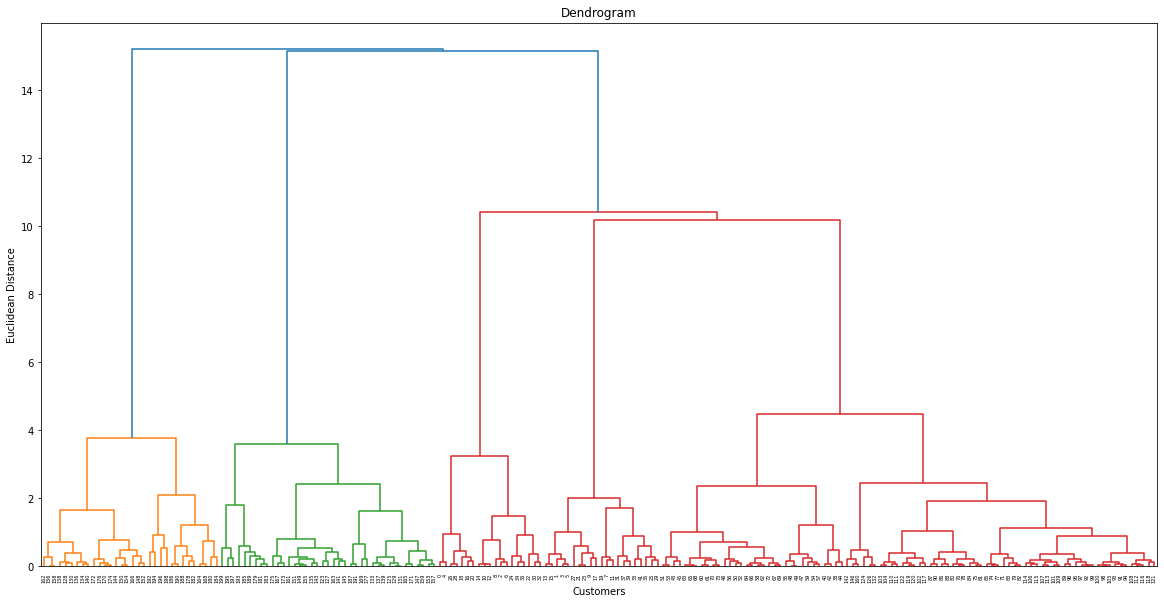

In [63]:
# using the dendogram technique to find the clusters
plt.figure(figsize = (20,10))
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(powerdemo.iloc[:,:2], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [64]:
# The ecludian distance is basically a denodrogramic distances which tells how far are the clusters from other clusters 

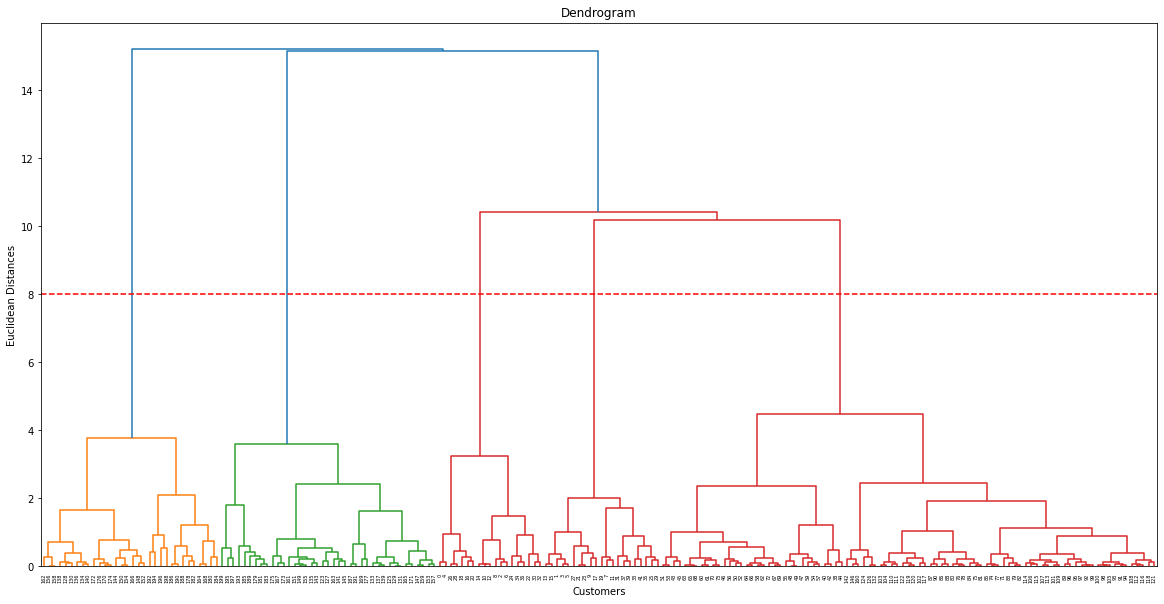

In [68]:
plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(powerdemo.iloc[:,:2], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y = 8, color = 'r', linestyle = '--')
plt.show()

In [69]:
# We have got 5 clusters 

# Hierarchical clustering

In [84]:
from sklearn.cluster import AgglomerativeClustering
hc =  AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward' )
y_hc = hc.fit_predict(powerdemo.iloc[:,:2].values)

In [90]:
np.unique(y_hc) # five clusters 

array([0, 1, 2, 3, 4], dtype=int64)

In [95]:
powerdemo.rename(columns = {'labels':'K means labels'},inplace = True)

In [97]:
powerdemo['Hier labels'] = y_hc

In [99]:
# let's comparte the clusters formed by kmeans and heirarchical 

In [105]:
powerdemo[powerdemo['K means labels'] == 0].head()

,Annual Income (k$),Spending Score (1-100),K means labels,Hier labels
40,-0.829638,-0.543717,0,0
42,-0.785922,-0.503866,0,0
43,-0.785922,0.447712,0,0
46,-0.742592,0.225966,0,0
47,-0.742592,-0.075650,0,0


Kmeans clustering


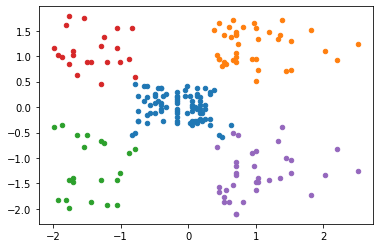

In [121]:
print('Kmeans clustering')
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(0,5):
    plt.scatter(powerdemo[powerdemo['K means labels'] == i].iloc[:,0],powerdemo[powerdemo['K means labels'] == i].iloc[:,1], s=20)
plt.show()

Heirarchical Clustering


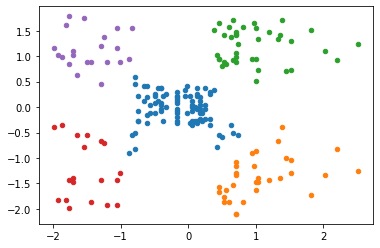

In [120]:
print('Heirarchical Clustering')
for i in range(0,5):
    plt.scatter(powerdemo[powerdemo['Hier labels'] == i].iloc[:,0],powerdemo[powerdemo['Hier labels'] == i].iloc[:,1], s = 20)
plt.show()